# BellaBeat Project using R
## Scenario
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.
## Characters and products
#### Characters
* **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer
* **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* **Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help Bellabeat achieve them.

#### Products
* **Bellabeat app**: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
* **Leaf**: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
* **Time**: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
* **Spring**: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.
* **Bellabeat membership**: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

## Business Task
Sršen asks you to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. She then wants you to select one Bellabeat product to apply these insights to in your presentation.

The data used in this project is FitBit Fitness Tracker Data obtained from [Mobius](https://www.kaggle.com/arashnic)

## Setting up the environment
#### Loading the tidyverse package

In [1]:
#installing and loading the tidyverse package
#This package contains the readr, ggplot2, purrr, stringr, dplyr, tibble, tidyr, forcats packages

library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### Reading in the csv files into the r environment

In [2]:
daily_activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
heart_rate <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourly_steps <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourly_calories <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

## Data Exploration
### Exploring the data to get an idea of how the data looks

In [3]:
#Exploring the hourly_steps df
head(hourly_steps, 3)
glimpse(hourly_steps)

,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151


Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ StepTotal    <int> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 253, 2…


In [4]:
#Exploring the data - sleep df
head(sleep, 3)
glimpse(sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


In [5]:
#Exploring the daily_activity df
head(daily_activity, 3)
glimpse(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [6]:
#weight df
head(weight, 3)
glimpse(weight)

#heart_rate df
head(heart_rate, 3)
glimpse(heart_rate)

#hourly_calories df
head(hourly_calories, 3)
glimpse(hourly_calories)

#hourly_intensities df
head(hourly_intensities, 3)
glimpse(hourly_intensities)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12


Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105


Rows: 2,483,658
Columns: 3
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ Time  <chr> "4/12/2016 7:21:00 AM", "4/12/2016 7:21:05 AM", "4/12/2016 7:21:…
$ Value <int> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, …


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59


Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ Calories     <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667


Rows: 22,099
Columns: 4
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/1…
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…


## Working on date/time columns

Splitting the ActivityHour into ActivityDate and ActivityTime and the formatting the ActivityDate into date type

In [7]:
#hourly_steps df
#Splitting the ActivityHour column into ActivityDate and ActivityTime columns
#Formatting the ActivityDate column from chr to date
new_hourly_steps <- hourly_steps %>%
mutate(ActivityHour = as.POSIXct(ActivityHour, format = "%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone())) %>%
separate(ActivityHour, 
        into = c("ActivityDate", "ActivityTime"), 
        sep = " ") %>%
mutate(ActivityDate = ymd(ActivityDate)) %>%
mutate(Weekday = weekdays(ActivityDate))
head(new_hourly_steps)
glimpse(new_hourly_steps)

,Id,ActivityDate,ActivityTime,StepTotal,Weekday
,<dbl>,<date>,<chr>,<int>,<chr>
1,1503960366,2016-04-12,00:00:00,373,Tuesday
2,1503960366,2016-04-12,01:00:00,160,Tuesday
3,1503960366,2016-04-12,02:00:00,151,Tuesday
4,1503960366,2016-04-12,03:00:00,0,Tuesday
5,1503960366,2016-04-12,04:00:00,0,Tuesday
6,1503960366,2016-04-12,05:00:00,0,Tuesday


Rows: 22,099
Columns: 5
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate <date> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-…
$ ActivityTime <chr> "00:00:00", "01:00:00", "02:00:00", "03:00:00", "04:00:00…
$ StepTotal    <int> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 253, 2…
$ Weekday      <chr> "Tuesday", "Tuesday", "Tuesday", "Tuesday", "Tuesday", "T…


On the sleep data frame; splitting the SleepDay column into Date and Time columns and then dropping the time column because I won't use it.

In [8]:
#sleep df
#splitting the SleepDay column into Date and Time columns
#then droppig time column
new_sleep <- separate(sleep, 
        col = SleepDay,
        into = c("Date", "Time"),
         sep = " ") %>% 
mutate(Date = mdy(Date)) %>% select(-Time)
head(new_sleep)
glimpse(new_sleep)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 413 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ Date               <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16, 20…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


On the daily_activity data frame; formatting the ActivityDate column from chr to date.

In [9]:
#Daily_activity df
#Formating the ActivityDate column from chr to date
daily_activity_date <- daily_activity %>% mutate(ActivityDate = mdy(ActivityDate))
daily_activity <- daily_activity_date
head(daily_activity)
glimpse(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

On the weight data frame; separating the Date column into date and time columns, then formatting date column to date type, and finally drop time column.

In [10]:
#weight df
#start by separating the Date column into date and time columns
#then drop time column and then format date column to date type
new_weight <- separate(weight,
                      col = Date,
                      into = c("Date", "Time"),
                      sep = " ") %>% 
mutate(Date = mdy(Date)) %>%
select(-Time)

head(new_weight)
glimpse(new_weight)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 67 rows [1, 2, 3, 4, 5, 6, 7,
8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<date>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,2016-05-02,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,2016-05-03,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,2016-04-13,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,2016-04-21,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,2016-05-12,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,2016-04-17,72.4,159.6147,25,27.45,True,1.460938e+12


Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <date> 2016-05-02, 2016-05-03, 2016-04-13, 2016-04-21, 2016-0…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


On the heart_rate data frame; splitting the time column into date and time columns, and then formatting the date column from chr to date

In [11]:
#heart_rate df
#Splitting the time column of the heart_rate df into date and time columns
#Formatting the date column from chr to date
new_heart_rate <- heart_rate %>% 
separate(Time, 
        into = c("Date", "Time"), 
        sep = " ") %>%
mutate(Date = mdy(Date))
#heart_rate$Time <- as.Date(heart_rate$Time, format = "%m/%d/%Y %H:%M:%S")
head(new_heart_rate)
glimpse(new_heart_rate)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 2483658 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,Id,Date,Time,Value
,<dbl>,<date>,<chr>,<int>
1,2022484408,2016-04-12,7:21:00,97
2,2022484408,2016-04-12,7:21:05,102
3,2022484408,2016-04-12,7:21:10,105
4,2022484408,2016-04-12,7:21:20,103
5,2022484408,2016-04-12,7:21:25,101
6,2022484408,2016-04-12,7:22:05,95


Rows: 2,483,658
Columns: 4
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ Date  <date> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-12, 201…
$ Time  <chr> "7:21:00", "7:21:05", "7:21:10", "7:21:20", "7:21:25", "7:22:05"…
$ Value <int> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, …


On the hourly_calories data frame; splitting the ActivityHour column into ActivityDate and ActivityTime columns, and then formatting the date column from chr to date

In [12]:
#hourly_calories df
#Splitting the ActivityHour column into ActivityDate and ActivityTime columns
#Formatting the ActivityDate column from chr to date
new_hourly_calories <- hourly_calories %>% 
separate(ActivityHour, 
        into = c("ActivityDate", "ActivityTime"), 
        sep = " ") %>%
mutate(ActivityDate = mdy(ActivityDate))
head(new_hourly_calories)
glimpse(new_hourly_calories)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 22099 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,Id,ActivityDate,ActivityTime,Calories
,<dbl>,<date>,<chr>,<int>
1,1503960366,2016-04-12,12:00:00,81
2,1503960366,2016-04-12,1:00:00,61
3,1503960366,2016-04-12,2:00:00,59
4,1503960366,2016-04-12,3:00:00,47
5,1503960366,2016-04-12,4:00:00,48
6,1503960366,2016-04-12,5:00:00,48


Rows: 22,099
Columns: 4
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate <date> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-…
$ ActivityTime <chr> "12:00:00", "1:00:00", "2:00:00", "3:00:00", "4:00:00", "…
$ Calories     <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …


On the hourly_intensities data frame; splitting the ActivityHour column into ActivityDate and ActivityTime columns, and then formatting the date column from chr to date

In [13]:
#hourly_intensities df
#Splitting the ActivityHour column into ActivityDate and ActivityTime columns
#Formatting the ActivityDate column from chr to date
new_hourly_intensities <- hourly_intensities %>% 
separate(ActivityHour, 
        into = c("ActivityDate", "ActivityTime"), 
        sep = " ") %>%
mutate(ActivityDate = mdy(ActivityDate))
head(new_hourly_intensities)
glimpse(new_hourly_intensities)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 22099 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,Id,ActivityDate,ActivityTime,TotalIntensity,AverageIntensity
,<dbl>,<date>,<chr>,<int>,<dbl>
1,1503960366,2016-04-12,12:00:00,20,0.333333
2,1503960366,2016-04-12,1:00:00,8,0.133333
3,1503960366,2016-04-12,2:00:00,7,0.116667
4,1503960366,2016-04-12,3:00:00,0,0.000000
5,1503960366,2016-04-12,4:00:00,0,0.000000
6,1503960366,2016-04-12,5:00:00,0,0.000000


Rows: 22,099
Columns: 5
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityDate     <date> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-12, 2016…
$ ActivityTime     <chr> "12:00:00", "1:00:00", "2:00:00", "3:00:00", "4:00:00…
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…


## Statistical summaries of the data frames

#### Exploring the statistical summary of the daily_activity, steps, calories, intensities, weight, and heart_rate data frames

Note that the daily_activity df has the intensities and calories and steps info in it

In [14]:
#Finding the statistical summary of each of the above datasets
summary(daily_activity)

       Id             ActivityDate          TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Median :2016-04-26   Median : 7406   Median : 5.245  
 Mean   :4.855e+09   Mean   :2016-04-26   Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDist

From the above statistical summary, it's evident that the mean value of the sedentary minutes is 991.2 which is far greater than the sum of the very active minutes (21.16), fairly active minutes (13.56) and lightly active minutes (192) 

In [15]:
#Working out the statistical summary of the heart_rate data frame
summary(new_heart_rate)

       Id                 Date                Time               Value       
 Min.   :2.022e+09   Min.   :2016-04-12   Length:2483658     Min.   : 36.00  
 1st Qu.:4.388e+09   1st Qu.:2016-04-19   Class :character   1st Qu.: 63.00  
 Median :5.554e+09   Median :2016-04-26   Mode  :character   Median : 73.00  
 Mean   :5.514e+09   Mean   :2016-04-26                      Mean   : 77.33  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04                      3rd Qu.: 88.00  
 Max.   :8.878e+09   Max.   :2016-05-12                      Max.   :203.00  

In [16]:
#Working out the statistical summary of the weight data frame
summary(weight)

       Id                Date              WeightKg       WeightPounds  
 Min.   :1.504e+09   Length:67          Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   Class :character   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Mode  :character   Median : 62.50   Median :137.8  
 Mean   :7.009e+09                      Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09                      3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09                      Max.   :133.50   Max.   :294.3  
                                                                        
      Fat             BMI        IsManualReport         LogId          
 Min.   :22.00   Min.   :21.45   Length:67          Min.   :1.460e+12  
 1st Qu.:22.75   1st Qu.:23.96   Class :character   1st Qu.:1.461e+12  
 Median :23.50   Median :24.39   Mode  :character   Median :1.462e+12  
 Mean   :23.50   Mean   :25.19                      Mean   :1.462e+12  
 3rd Qu.:24.25   3rd Qu.:25.56                      3rd 

From the above statistical summary, the mean BMI is 25.56 which is slighly higher than the recommended BMI range of 18.5 to 24.9 according to CDC. However, the median BMI is 24.39 and is therefore in the recommended range.
The maximum BMI recorded is 47.54 which is almost twice the maximum recommended BMI for adults and is therefore worrying healthwise.

In [17]:
#Working out the statistical summary of the hourly_calories df
summary(new_hourly_calories)

       Id             ActivityDate        ActivityTime          Calories     
 Min.   :1.504e+09   Min.   :2016-04-12   Length:22099       Min.   : 42.00  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   Class :character   1st Qu.: 63.00  
 Median :4.445e+09   Median :2016-04-26   Mode  :character   Median : 83.00  
 Mean   :4.848e+09   Mean   :2016-04-26                      Mean   : 97.39  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-03                      3rd Qu.:108.00  
 Max.   :8.878e+09   Max.   :2016-05-12                      Max.   :948.00  

In [18]:
#Working out the statistical summary of the hourly_intensities df
summary(new_hourly_intensities)

       Id             ActivityDate        ActivityTime       TotalIntensity  
 Min.   :1.504e+09   Min.   :2016-04-12   Length:22099       Min.   :  0.00  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   Class :character   1st Qu.:  0.00  
 Median :4.445e+09   Median :2016-04-26   Mode  :character   Median :  3.00  
 Mean   :4.848e+09   Mean   :2016-04-26                      Mean   : 12.04  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-03                      3rd Qu.: 16.00  
 Max.   :8.878e+09   Max.   :2016-05-12                      Max.   :180.00  
 AverageIntensity
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0500  
 Mean   :0.2006  
 3rd Qu.:0.2667  
 Max.   :3.0000  

## Joining DFs
####  Left joining the hourly steps, hourly calories, hourly intensities df

In [19]:
#left joining hourly steps,hourly calories, hourly intensities
hourly_steps_calories_intensities <- hourly_steps %>% 
  left_join(hourly_calories, by = c("Id", "ActivityHour")) %>% 
  left_join(hourly_intensities, by = c("Id", "ActivityHour")) %>% 
  separate(ActivityHour, sep = " ", into = c("ActivityDate","ActivityTime")) %>% 
  mutate(ActivityDate = mdy(ActivityDate)) %>%
  mutate(Day = weekdays(ActivityDate)) %>% 
  mutate(StepTotal = mean(StepTotal)) %>%
  select(Id,ActivityDate, Day, everything())
head(hourly_steps_calories_intensities)
glimpse(hourly_steps_calories_intensities)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 22099 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,Id,ActivityDate,Day,ActivityTime,StepTotal,Calories,TotalIntensity,AverageIntensity
,<dbl>,<date>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
1,1503960366,2016-04-12,Tuesday,12:00:00,320.1663,81,20,0.333333
2,1503960366,2016-04-12,Tuesday,1:00:00,320.1663,61,8,0.133333
3,1503960366,2016-04-12,Tuesday,2:00:00,320.1663,59,7,0.116667
4,1503960366,2016-04-12,Tuesday,3:00:00,320.1663,47,0,0.000000
5,1503960366,2016-04-12,Tuesday,4:00:00,320.1663,48,0,0.000000
6,1503960366,2016-04-12,Tuesday,5:00:00,320.1663,48,0,0.000000


Rows: 22,099
Columns: 8
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityDate     <date> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-12, 2016…
$ Day              <chr> "Tuesday", "Tuesday", "Tuesday", "Tuesday", "Tuesday"…
$ ActivityTime     <chr> "12:00:00", "1:00:00", "2:00:00", "3:00:00", "4:00:00…
$ StepTotal        <dbl> 320.1663, 320.1663, 320.1663, 320.1663, 320.1663, 320…
$ Calories         <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, …
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…


## Fitness Gadget Usage

#### Exploring how often the FitBit Users used their fitness gadgets and classifying the range of days into 'High Usage', 'Average Usage', and 'Low Usage'

In [20]:
cumulative_days <- daily_activity %>% group_by(Id) %>% summarize(cumulative_days = sum(n())) %>% 
mutate(frequency = case_when(cumulative_days <= 14 ~ "low usage",
                            cumulative_days >= 15 & cumulative_days <= 21 ~ "average usage",
                            cumulative_days >= 22 & cumulative_days <= 31 ~ "high usage")) %>%
mutate(frequency = factor(frequency, level = c("low usage", "average usage", "high usage")))
head(cumulative_days)

Id,cumulative_days,frequency
<dbl>,<int>,<fct>
1503960366,31,high usage
1624580081,31,high usage
1644430081,30,high usage
1844505072,31,high usage
1927972279,31,high usage
2022484408,31,high usage


#### Adding day of the week column to the daily activity df

In [21]:
daily_activity_weekdays <- daily_activity %>% 
mutate(Weekday = weekdays(ActivityDate)) %>% 
select(Id, ActivityDate, Weekday, everything()) %>%  
mutate(TotalMinutesWorn = SedentaryMinutes+LightlyActiveMinutes+FairlyActiveMinutes+VeryActiveMinutes) %>% 
  mutate(TotalDuration = seconds_to_period(TotalMinutesWorn * 60))
head(daily_activity_weekdays)

,Id,ActivityDate,Weekday,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesWorn,TotalDuration
,<dbl>,<date>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<Period>
1,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1094,18H 14M 0S
2,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,1033,17H 13M 0S
3,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,1440,1d 0H 0M 0S
4,1503960366,2016-04-15,Friday,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,998,16H 38M 0S
5,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,1040,17H 20M 0S
6,1503960366,2016-04-17,Sunday,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,761,12H 41M 0S


#### Merging cumulative days df with hourly_steps_calories_intensities dfs

In [22]:
merged_hourly_df <- merge(cumulative_days, hourly_steps_calories_intensities, by = "Id")
glimpse(merged_hourly_df)

Rows: 22,099
Columns: 10
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ cumulative_days  <int> 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 3…
$ frequency        <fct> high usage, high usage, high usage, high usage, high …
$ ActivityDate     <date> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-12, 2016…
$ Day              <chr> "Tuesday", "Tuesday", "Tuesday", "Tuesday", "Tuesday"…
$ ActivityTime     <chr> "12:00:00", "1:00:00", "2:00:00", "3:00:00", "4:00:00…
$ StepTotal        <dbl> 320.1663, 320.1663, 320.1663, 320.1663, 320.1663, 320…
$ Calories         <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, …
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…


#### Merging cumulative days df with daily_activity_weekdays df

In [23]:
#merging cumulative_days df with daily_activity_weekdays df
daily_activity_cum_days <- merge(cumulative_days, daily_activity_weekdays, by = "Id")
head(daily_activity_cum_days)
glimpse(daily_activity_cum_days)

,Id,cumulative_days,frequency,ActivityDate,Weekday,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesWorn,TotalDuration
,<dbl>,<int>,<fct>,<date>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<Period>
1,1503960366,31,high usage,2016-04-12,Tuesday,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1094,18H 14M 0S
2,1503960366,31,high usage,2016-04-13,Wednesday,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,1033,17H 13M 0S
3,1503960366,31,high usage,2016-04-14,Thursday,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,1440,1d 0H 0M 0S
4,1503960366,31,high usage,2016-04-15,Friday,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,998,16H 38M 0S
5,1503960366,31,high usage,2016-04-16,Saturday,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,1040,17H 20M 0S
6,1503960366,31,high usage,2016-04-17,Sunday,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,761,12H 41M 0S


Rows: 940
Columns: 20
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ cumulative_days          <int> 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 3…
$ frequency                <fct> high usage, high usage, high usage, high usag…
$ ActivityDate             <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ Weekday                  <chr> "Tuesday", "Wednesday", "Thursday", "Friday",…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveD

#### Exploring in terms of percentage how often the fitness trackers are used

In [24]:
#Exploring in terms of percentage how often the fitness trackers are used
percent_usage <- cumulative_days %>% 
group_by(frequency) %>% 
summarize(cum_id = n_distinct(Id)) %>% 
mutate(percent_freq = cum_id/sum(cum_id)) %>% 
arrange(percent_freq) %>%
mutate(percent_freq = scales::percent(percent_freq))
head(percent_usage)

frequency,cum_id,percent_freq
<fct>,<int>,<chr>
low usage,1,3.0%
average usage,3,9.1%
high usage,29,87.9%


#### Visualizing the frequency distribution, in percentage, of how often the FitBit trackers are worn using a bar graph and a pie chart

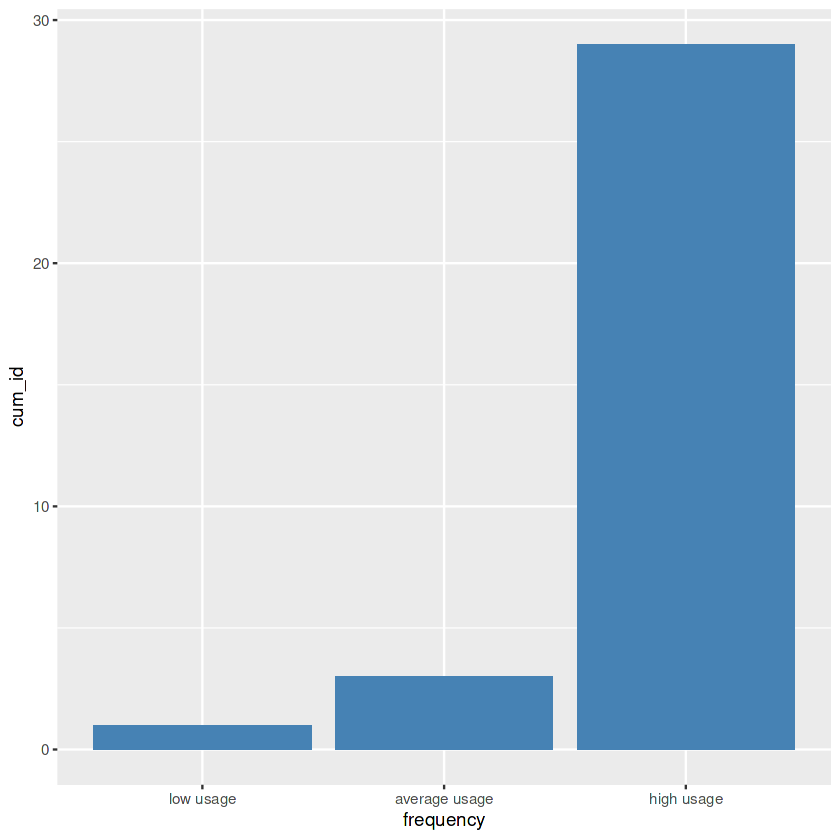

In [25]:
ggplot(data = percent_usage, mapping=aes(x=frequency, y=cum_id)) +
geom_col(fill = 'steelblue')

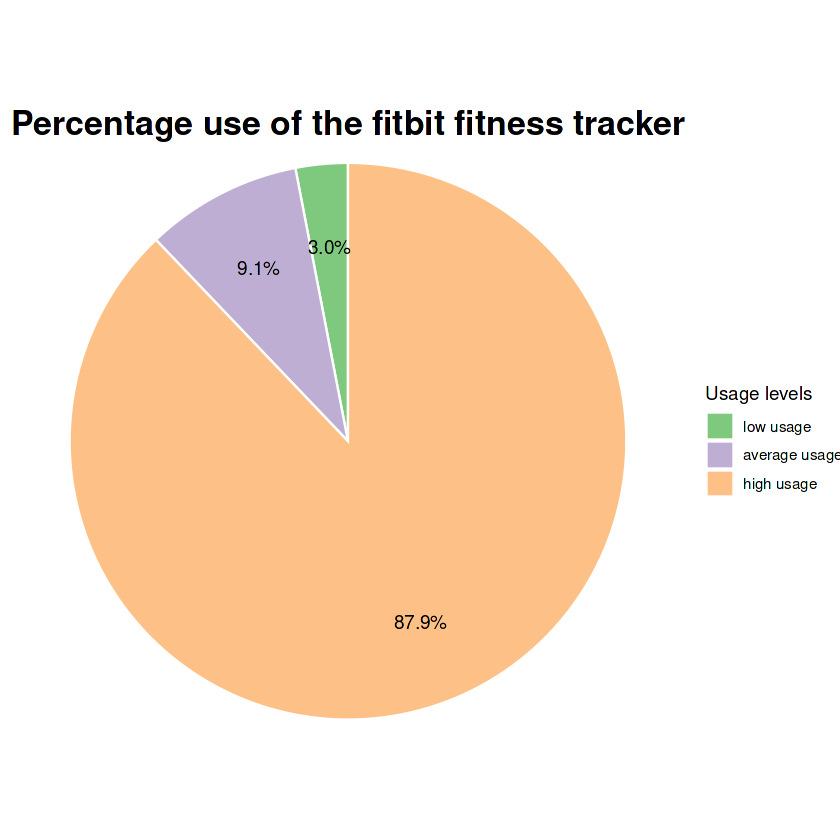

In [26]:
#plot pie chart for distribution for different types of users
ggplot(percent_usage,aes(fill=frequency ,y = cum_id, x="")) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0)+
  scale_fill_brewer(palette='Accent')+
  theme_void()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5,vjust= -5, size = 20, face = "bold")) +
  geom_text(aes(label = percent_freq, x=1.2),position = position_stack(vjust = 0.5))+
  labs(title="Percentage use of the fitbit fitness tracker")+
  guides(fill = guide_legend(title = "Usage levels"))
  options(repr.plot.width = 1, repr.plot.height = 1)

## Steps Walked

####  Finding out the average number of steps walked per day of the week
Merging the sleep data frame with the daily_activity data frame

In [27]:
#rename daily_activity$ActivityDate to Date for merging compatibility with the sleep df
daily_activity2 <- daily_activity %>% rename(Date = ActivityDate)
daily_activity_sleep <- merge(daily_activity2, new_sleep, by = c("Id", "Date"))
head(daily_activity_sleep)
glimpse(daily_activity_sleep)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


Rows: 413
Columns: 18
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ Date                     <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ TotalDistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ FairlyActiveMinutes      <int> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ LightlyActiveMin

Adding the weekday column to the merged data frame and then rearranging the columns so that the 'weekday column' becomes the third column

In [28]:
#Adding the weekday column to the merged df
weekday_steps_sleep <- daily_activity_sleep %>%
  mutate(Weekday = weekdays(Date)) %>% 
mutate(Weekday = ordered(Weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
"Friday", "Saturday", "Sunday"))) %>% select(Id, Date, Weekday, everything())
head(weekday_steps_sleep)

,Id,Date,Weekday,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,2016-04-17,Sunday,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,2016-04-19,Tuesday,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


Working out the mean number of steps walked by the fitbit users per each day of the week.

In [29]:
#Finding out the average number of steps walked per day of the week, and
#Finding out the mean number of minutes slept per day of the week
 weekday_steps_sleep <- weekday_steps_sleep %>%
  group_by(Weekday) %>%
  summarize (Avg_steps = mean(TotalSteps), Avg_sleep_minutes = mean(TotalMinutesAsleep))

head(weekday_steps_sleep)

Weekday,Avg_steps,Avg_sleep_minutes
<ord>,<dbl>,<dbl>
Monday,9339.851,418.8298
Tuesday,9182.692,404.5385
Wednesday,8022.864,434.6818
Thursday,8205.354,402.3692
Friday,7901.404,405.4211
Saturday,9948.690,420.8103


#### Visualizing the distribution of the mean TotalSteps per day of the week vs mean TotalMinutesAsleep per day of the week

NULL

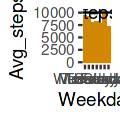

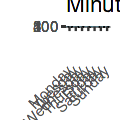

In [30]:
#Visualizing the average steps walked per day of the week
ggplot(weekday_steps_sleep) +
    geom_col(aes(Weekday, Avg_steps), fill = "#D18700") +
    geom_hline(yintercept = 10000) +
    annotate("text", x=4, y=10200, label="Recommended steps per day, 10,000")
    labs(title = "Steps walked per day of the week", x= "", y = "") +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 1))

#Visualizing the average minutes slept per day of the week
ggplot(weekday_steps_sleep, aes(Weekday, Avg_sleep_minutes)) +
    geom_col(fill = "#33ccff") +
    geom_hline(yintercept = 480) +
    annotate("text", x=4, y=490, label="Recommeded adult sleep time, 480 minutes (8hrs)") +
    labs(title = "Minutes slept per day of the week", x= "", y = "") +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 1))

#### Bar Graph: Exploring the average steps walked per hour in a day

Bar graph that will help visualize the average steps walked per hour in a day.

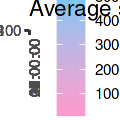

In [31]:
#Average steps walked per hour in a day
#Bar graph 
  bargraph_hourly_steps <- new_hourly_steps %>% 
  group_by(ActivityTime) %>% 
  summarize(Avg_steps = mean(StepTotal)) 

  ggplot(data = bargraph_hourly_steps) +
  geom_col(mapping = aes(x=ActivityTime, y=Avg_steps, fill= Avg_steps)) + 
  labs(title = "Average steps per hour in a day", x="", y="") + 
  scale_fill_gradient(low = "#ff99cc", high = "#33ccff") +
  #geom_tile(color= "#D3D3D3", lwd =.22, linetype = 1) +
  theme(axis.text.x = element_text(angle = 90))

#### Heatmap: Visualizing the average steps walked by FitBit Fitness Tracker users per hour, for each day of the week

Working out the mean total steps in the new_hourly_steps df 

In [32]:
avg_hourly_steps <- new_hourly_steps %>% 
group_by(Weekday, ActivityTime) %>% 
summarize(Avg_steps = mean(StepTotal))
head(avg_hourly_steps)

`summarise()` has grouped output by 'Weekday'. You can override using the
`.groups` argument.


Weekday,ActivityTime,Avg_steps
<chr>,<chr>,<dbl>
Friday,00:00:00,44.27778
Friday,01:00:00,19.00794
Friday,02:00:00,16.27778
Friday,03:00:00,10.80159
Friday,04:00:00,14.43651
Friday,05:00:00,61.23016


Heatmap to help in visualizing the average steps walked per hour, for each day of the week

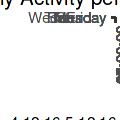

In [33]:
#Heatmap to show the activity level of the fitbit users per day of the week
ggplot(avg_hourly_steps, aes(x=ActivityTime, y=Weekday, fill= Avg_steps)) +
  theme(axis.text.x= element_text(angle = 90))+
  labs(title= "Hourly Activity per Day of the Week", x="", y="",fill = "avg_steps", caption= 'Data Source: FitBit Tracker Data 4.12.16-5.12.16') +
  scale_fill_gradient(low= "#FFFFFF", high="#4169e1") +
  #geom_tile(color= "#D3D3D3", lwd =.22, linetype = 1) +
  coord_fixed() +
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=12), panel.background= element_blank())

#### Heatmaps: Visualizing average steps walked per hour in a day, for each usage category, (ie) low usage, average usage and high usage

In [34]:
#Heatmaps for the three usage levels, low - average - high usage, per day, per hour

#### Bar graphs: Visualizing average steps walked per hour in a day, for each usage category, (ie) low usage, average usage and high usage


In [35]:
#Bar graphs for the three usage levels, low - average - high usage, per day, per hour

## Correlating the variables and visualizing the correlations
#### Correlation between total distance and total steps and its viz

[1] 0.9853688

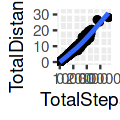

In [36]:
cor(daily_activity$TotalSteps, daily_activity$TotalDistance, method = c("pearson", "kendall", "spearman"))
ggplot(data = daily_activity, aes(x=TotalSteps, y=TotalDistance)) +
geom_point() + geom_jitter() +
geom_smooth(method = 'loess', formula = 'y~x') 

From the above correlation and the scatter plot, it is evident that there is a very string correlation between the total steps recorded and the total distance covered

#### Correlating time in bed vs time asleep and the viz

[1] 0.9304575

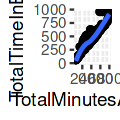

In [37]:
cor(sleep$TotalTimeInBed, sleep$TotalMinutesAsleep, method = c("pearson", "kendall", "spearman"))
ggplot(data = sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) +
geom_point() + geom_jitter() +
geom_smooth(method = 'loess', formula = 'y~x') 

There is also a very strong correlation between the time in bed and the time asleep variables as recorde by the FitBit Fitness Tracker as is evident in the scatter plot above and the coefficient of correlation (0.930)

#### Correlation between very active minutes and very active distance

[1] 0.8266815

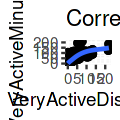

In [38]:
cor(daily_activity$VeryActiveMinutes, daily_activity$VeryActiveDistance, method = c("pearson", "kendall", "spearman"))
ggplot(data = daily_activity, aes(x=VeryActiveDistance, y=VeryActiveMinutes)) + geom_point() + geom_jitter() +
geom_smooth(method = 'loess', formula = 'y~x') + labs(title = "Correlating very active minutes vs very active distance")

There is a moderately strong correlation between very active minutes and very active distance as is evident in the above scatter plot and the correlation coeficient of 0.8267

#### Correlating weight(Kg) vs BMI

[1] 0.7356837

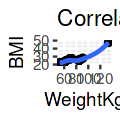

In [39]:
cor(weight$WeightKg, weight$BMI, method = c("pearson", "kendall", "spearman"))
ggplot(data = weight, aes(x=WeightKg, y=BMI)) + 
geom_point() + 
geom_jitter() +
geom_smooth(method = 'loess', formula = 'y~x') +
labs(title = "Correlating weight(kg) vs BMI")

There is a moderate correlation betweem Weight in kg and BMI with a correlation coefficient of 0.736

#### Correlating total steps and calories

[1] 0.5915681

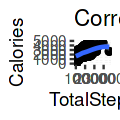

In [40]:
cor(daily_activity$TotalSteps, daily_activity$Calories, method = c("pearson", "kendall", "spearman"))
ggplot(data = daily_activity, aes(x=TotalSteps, y=Calories)) + geom_point() + geom_jitter() +
geom_smooth(method = 'loess', formula = 'y~x') + labs(title = "Correlating total steps and calories")

The correlation coefficient between total steps and calories is just average at 0.592

#### Correlating very active minutes and total steps

[1] 0.6670787

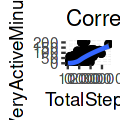

In [41]:
cor(daily_activity$VeryActiveMinutes, daily_activity$TotalSteps, method = c("pearson", "kendall", "spearman"))
ggplot(data = daily_activity, aes(x=TotalSteps, y=VeryActiveMinutes)) + geom_point() + geom_jitter() +
geom_smooth(method = 'loess', formula = 'y~x') + labs(title = "Correlating very active minutes and total steps")

There is a correlation between very active minutes and total steps with a coefficient of 0.667

#### Correlating between sedentary active minutes and sedentary minutes

[1] 0.03547461

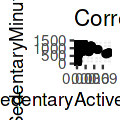

In [42]:
cor(daily_activity$SedentaryActiveDistance, daily_activity$SedentaryMinutes, method = c("pearson", "kendall", "spearman"))
ggplot(data = daily_activity, aes(x=SedentaryActiveDistance, y=SedentaryMinutes)) + geom_point() + geom_jitter() + labs(title="Correlating between sedentary active minutes and sedentary minutes")

There is absolutely NO correlation between sedentary active distance and sedentary minutes

#### Correlating between Total Distance and Tracker Distance

[1] 0.9995047

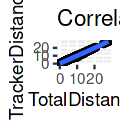

In [43]:
cor(daily_activity$TrackerDistance, daily_activity$TotalDistance, method = c("pearson", "kendall", "spearman"))
ggplot(data = daily_activity, aes(x=TotalDistance, y=TrackerDistance)) + geom_point() + geom_jitter() +
geom_smooth(method = 'loess', formula = 'y~x') + labs(title = "Correlating Tracker Distance vs Total Distance")

There is a VERY STRONG correlation between TrackerDistance and Total Distance as is evident in the visualization above. The coefficient of correlation is 0.9995

## Findings
1. There is a general lack of motivation to engage in fitness activities going by the sedentary minutes figures. Alternatively, the FitBit customers have a genaral problem/challenge with using the FitBit fitness tracker.

2. The average number of steps recorded is 7638 which is less than the CDC recommended number of steps per day that is 10,000 steps per day.

## Recommendations

1. The time spent in a sedentary state outweighs the time spent in any state of activity by more than 3 times. This indicates that there is general lack of motivation for the FitBit participants to engage in any form of activity no matter how es intense it is. 
I recommend that the BellaBeat fitness tracker to incorporate a fitness awareness notification system in their products to not only remind their customers to engage themselves in an activity but to also give them a health tip associated with the activity they'll engage in.
This notification system could even break down an activity into small portions that are timed and alert the participant that they have achieved the smaller goal as they strive to achieve the major goal of the day.

2. There is a very strong correlation between the total distance covered and the tracker distance measured by the fitness tracker. This indiactes that the tracking device is very accurate in terms of measuring the distance. This is a feature that the BellaBeat company should implement in their devices with the same level of accuracy or even more.

3. BellaBeat should make their fitness analysis report very user friendly and easy to understand. This will help their customers understand what they have achieved and how it is contributing to their overall body and health fitness.

4. The BellaBeat products should incorporate a feature that allows their customers to specify their fitness goal first thing after purchasing their product so that the fitness product they have purchased can serve to keep them on track.

5. The BellaBeat's fitness products should have a very easy-to-use user manual. It is possible that the FitBit users didn't have adequate knowledge on how their fitness gadgets were supposed to be used and therefore the devices ended up not being used at all or they were not used appropriately

6. BellaBeat should also consider incorpoarating a 24/7 customer support functionality and an easy-to-use customer feedback feature/functinality to know how best they can improve/serve their customers more efficiently.

7. Incorporating a feature that links every customer to their physician or someone they can trust to encourage them to hit each day's fitness target could be a great way to keep their customers motivated.

## Appendix
#### Special Appreciation
After working on the FitBit Fitness Tracker Data from scratch, I felt that I had done a satisfactory job. I later compared my work with that of the following people and realised that there were areas that I could improve on in my analysis.
I drew inspiration and motivation from their work and it helped me improve on mine.
1. [IRENASHEN1](https://www.kaggle.com/code/irenashen1/capstone-bellabeat-case-study-r/notebook)
2. [ZULKHAIREE SULAIMAN](https://www.kaggle.com/code/zulkhaireesulaiman/bellabeat-capstone-project-in-r/notebook)
3. [MACARENA LACASA](https://www.kaggle.com/code/macarenalacasa/capstone-case-study-bellabeat/notebook) 

Thank you for sharing your work!

I also did extensive research on the internet regarding r programming in the following websites: stackoverflow, geeksforgeeks, data camp, rdocumentation, youtube just to mention a few.

I wish you well as you work on your capstone project!